In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_csv('eda_data.csv')

df.columns

df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

df_dum = pd.get_dummies(df_model)

from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

print(np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 4)))

# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
print(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    


err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


print(np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3)))

tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))

print(mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2))

-19.77069790381779
-19.257798079999773
-15.009988890598029
18.85518999020981
19.665303712749914
11.25704697986577
14.29164068680021


In [2]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = ['Linear Regression', 'Lasso Regression', 'Random Forest',   'Decision Tree', 'Gradient Boosting', ]
mae_scores = []
r2_scores = []
mse_scores = []

mae_lm = mean_absolute_error(y_test, tpred_lm)
r2_lm = r2_score(y_test, tpred_lm)
mse_lm = mean_squared_error(y_test, tpred_lm)
mae_scores.append(mae_lm)
r2_scores.append(r2_lm)
mse_scores.append(mse_lm)

mae_lml = mean_absolute_error(y_test, tpred_lml)
r2_lml = r2_score(y_test, tpred_lml)
mse_lml = mean_squared_error(y_test, tpred_lml)
mae_scores.append(mae_lml)
r2_scores.append(r2_lml)
mse_scores.append(mse_lml)

mae_rf = mean_absolute_error(y_test, tpred_rf)
r2_rf = r2_score(y_test, tpred_rf)
mse_rf = mean_squared_error(y_test, tpred_rf)
mae_scores.append(mae_rf)
r2_scores.append(r2_rf)
mse_scores.append(mse_rf)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
tpred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, tpred_dt)
r2_dt = r2_score(y_test, tpred_dt)
mse_dt = mean_squared_error(y_test, tpred_dt)
mae_scores.append(mae_dt)
r2_scores.append(r2_dt)
mse_scores.append(mse_dt)

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
tpred_gb = gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, tpred_gb)
r2_gb = r2_score(y_test, tpred_gb)
mse_gb = mean_squared_error(y_test, tpred_gb)
mae_scores.append(mae_gb)
r2_scores.append(r2_gb)
mse_scores.append(mse_gb)

score_table = pd.DataFrame({'Model': models, 'MAE': mae_scores, 'R-squared': r2_scores, 'MSE': mse_scores})
score_table = score_table.sort_values('MSE', ascending=True)

print(score_table)


               Model        MAE  R-squared         MSE
2      Random Forest  11.257047   0.783398  354.037703
4  Gradient Boosting  15.614721   0.733845  435.033135
3      Decision Tree   8.949664   0.665866  546.145973
1   Lasso Regression  19.665304   0.604216  646.912823
0  Linear Regression  18.855190   0.578427  689.065222


In [3]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=10) 
X_reduced = pca.fit_transform(X)

print("Original Shape:", X.shape)
print("Reduced Shape:", X_reduced.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)



feature_names = df_dum.columns
final_feature_names = []
for component in pca.components_:
    max_index = component.argmax()
    final_feature_names.append(feature_names[max_index])

# Print the names of the final features
print("\nFinal Features:")
for name in final_feature_names:
    print(name)

Original Shape: (742, 178)
Reduced Shape: (742, 10)
Explained Variance Ratio: [9.98781528e-01 1.21432379e-03 8.34396185e-07 3.38703318e-07
 2.10826113e-07 1.90109753e-07 1.62657005e-07 1.44609850e-07
 1.37723786e-07 1.12168411e-07]

Final Features:
desc_len
age
num_comp
job_simp_na
seniority_senior
python_yn
seniority_na
job_simp_data scientist
excel
excel


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [5]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print(np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 4)))

# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
print(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    


err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print(np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3)))
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = rf.predict(X_test)


-21.972636159773167
-21.878931734477707
-17.115500777658138


In [6]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Calculate scores for each model
models = ['Linear Regression', 'Lasso Regression', 'Random Forest',   'Decision Tree', 'Gradient Boosting', ]
mae_scores = []
r2_scores = []
mse_scores = []

# Linear Regression
mae_lm = mean_absolute_error(y_test, tpred_lm)
r2_lm = r2_score(y_test, tpred_lm)
mse_lm = mean_squared_error(y_test, tpred_lm)
mae_scores.append(mae_lm)
r2_scores.append(r2_lm)
mse_scores.append(mse_lm)

# Lasso Regression
mae_lml = mean_absolute_error(y_test, tpred_lml)
r2_lml = r2_score(y_test, tpred_lml)
mse_lml = mean_squared_error(y_test, tpred_lml)
mae_scores.append(mae_lml)
r2_scores.append(r2_lml)
mse_scores.append(mse_lml)

# Random Forest
mae_rf = mean_absolute_error(y_test, tpred_rf)
r2_rf = r2_score(y_test, tpred_rf)
mse_rf = mean_squared_error(y_test, tpred_rf)
mae_scores.append(mae_rf)
r2_scores.append(r2_rf)
mse_scores.append(mse_rf)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
tpred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, tpred_dt)
r2_dt = r2_score(y_test, tpred_dt)
mse_dt = mean_squared_error(y_test, tpred_dt)
mae_scores.append(mae_dt)
r2_scores.append(r2_dt)
mse_scores.append(mse_dt)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
tpred_gb = gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, tpred_gb)
r2_gb = r2_score(y_test, tpred_gb)
mse_gb = mean_squared_error(y_test, tpred_gb)
mae_scores.append(mae_gb)
r2_scores.append(r2_gb)
mse_scores.append(mse_gb)



# Create a score table
score_table = pd.DataFrame({'Model': models, 'MAE': mae_scores, 'R-squared': r2_scores, 'MSE': mse_scores})
score_table = score_table.sort_values('MSE', ascending=True)

print(score_table)

               Model        MAE  R-squared          MSE
2      Random Forest  12.537987   0.751718   405.819861
4  Gradient Boosting  16.494993   0.673062   534.383329
3      Decision Tree  11.761745   0.587261   674.625839
1   Lasso Regression  23.636611   0.363115  1040.995742
0  Linear Regression  23.667187   0.362016  1042.792072


In [7]:
import random
r = []
for i in range(len(X)):
    r.append(random.random())
se = pd.Series(r)
df_dum['random'] = se.values

In [8]:
y = df_dum.avg_salary.values
X = df_dum.drop('avg_salary', axis =1)

In [9]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestClassifier for classification tasks
import numpy as np

# Create a random forest model
model = RandomForestRegressor()  # or RandomForestClassifier

# Train the model
model.fit(X, y)

# Get feature importance scores
importance_scores = model.feature_importances_

# Sort features based on importance scores
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_features = X.columns[sorted_indices]

# Print feature importance scores and sorted feature names
for score, feature in zip(importance_scores[sorted_indices], sorted_features):
    print(f"{feature}: {score}")

job_simp_analyst: 0.11201511187367824
hourly: 0.10505921001639795
seniority_senior: 0.0888475559422667
job_state_CA: 0.07159000655031841
job_simp_director: 0.06168201879862258
desc_len: 0.05903497093236951
Rating: 0.049007951879720395
job_simp_data scientist: 0.04605500910861138
age: 0.04313614726718004
random: 0.03336782144945815
python_yn: 0.02486584868090123
job_simp_na: 0.024624441868921525
seniority_na: 0.021416481860890867
job_simp_manager: 0.011653737945735316
num_comp: 0.01112736924933321
job_state_MA: 0.011094960910160673
Industry_Enterprise Software & Network Solutions: 0.009817000656857948
job_state_IL: 0.008790216099690128
Revenue_$500 million to $1 billion (USD): 0.008270586093110226
job_simp_mle: 0.0073072960734614
same_state: 0.0061602856147566065
Sector_Information Technology: 0.0060424120788694635
Industry_Food & Beverage Manufacturing: 0.005848675233013224
excel: 0.0057227410347525055
Type of ownership_Company - Public: 0.005658427406533147
job_simp_data engineer: 0.0

In [10]:
a = list(sorted_features)
a.index('random')

9

In [15]:
selected = sorted_features[:8]
X = df_dum[selected]

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print(np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 4)))

# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
print(np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    


err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


print(np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3)))



# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = rf.predict(X_test)
# Calculate scores for each model
models = ['Linear Regression', 'Lasso Regression', 'Random Forest',   'Decision Tree', 'Gradient Boosting', ]
mae_scores = []
r2_scores = []
mse_scores = []

# Linear Regression
mae_lm = mean_absolute_error(y_test, tpred_lm)
r2_lm = r2_score(y_test, tpred_lm)
mse_lm = mean_squared_error(y_test, tpred_lm)
mae_scores.append(mae_lm)
r2_scores.append(r2_lm)
mse_scores.append(mse_lm)

# Lasso Regression
mae_lml = mean_absolute_error(y_test, tpred_lml)
r2_lml = r2_score(y_test, tpred_lml)
mse_lml = mean_squared_error(y_test, tpred_lml)
mae_scores.append(mae_lml)
r2_scores.append(r2_lml)
mse_scores.append(mse_lml)

# Random Forest
mae_rf = mean_absolute_error(y_test, tpred_rf)
r2_rf = r2_score(y_test, tpred_rf)
mse_rf = mean_squared_error(y_test, tpred_rf)
mae_scores.append(mae_rf)
r2_scores.append(r2_rf)
mse_scores.append(mse_rf)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
tpred_dt = dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, tpred_dt)
r2_dt = r2_score(y_test, tpred_dt)
mse_dt = mean_squared_error(y_test, tpred_dt)
mae_scores.append(mae_dt)
r2_scores.append(r2_dt)
mse_scores.append(mse_dt)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
tpred_gb = gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, tpred_gb)
r2_gb = r2_score(y_test, tpred_gb)
mse_gb = mean_squared_error(y_test, tpred_gb)
mae_scores.append(mae_gb)
r2_scores.append(r2_gb)
mse_scores.append(mse_gb)



# Create a score table
score_table = pd.DataFrame({'Model': models, 'MAE': mae_scores, 'R-squared': r2_scores, 'MSE': mse_scores})
score_table = score_table.sort_values('MSE', ascending=True)

print(score_table)

-20.091122191645127
-19.96744103926119
-16.693580560255686
               Model        MAE  R-squared         MSE
2      Random Forest  13.618993   0.730159  441.057859
3      Decision Tree  10.587248   0.716153  463.951342
4  Gradient Boosting  19.165290   0.589885  670.337173
0  Linear Regression  21.226592   0.524963  776.453147
1   Lasso Regression  21.405763   0.515178  792.447117


In [18]:
X_train

,job_simp_analyst,hourly,seniority_senior,job_state_CA,job_simp_director,desc_len,Rating,job_simp_data scientist
481,1,0,0,0,0,2292,3.6,0
292,0,0,0,1,0,3965,3.9,0
349,0,0,1,0,0,3169,3.9,1
174,0,0,1,0,0,2309,3.7,0
135,0,0,0,0,0,7548,3.4,1
...,...,...,...,...,...,...,...,...
71,0,0,0,0,1,2903,3.6,0
106,1,0,0,0,0,5609,4.7,0
270,0,0,1,0,0,1345,3.7,0
435,0,0,0,1,0,3740,4.7,1


In [19]:
# Define the range of number of selected features
n_features_range = range(1, 100)

# Initialize lists to store the evaluation metrics for each set of selected features
mse_list = []
r2_list = []
mae_list = []

# Iterate over different numbers of selected features
for n_features in n_features_range:
    # Select top n_features from sorted_features
    selected = sorted_features[:n_features]
    X = df_dum[selected]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)
    linear_pred = linear_reg.predict(X_test)
    mse_linear = mean_squared_error(y_test, linear_pred)
    r2_linear = r2_score(y_test, linear_pred)
    mae_linear = mean_absolute_error(y_test, linear_pred)
    
    # Random Forest Regression
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)
    rf_pred = rf_reg.predict(X_test)
    mse_rf = mean_squared_error(y_test, rf_pred)
    r2_rf = r2_score(y_test, rf_pred)
    mae_rf = mean_absolute_error(y_test, rf_pred)
    
    # lasso regression 
    lm_l = Lasso(alpha=.13)
    lm_l.fit(X_train,y_train)
    tpred_lml = lm_l.predict(X_test)
    mae_lml = mean_absolute_error(y_test, tpred_lml)
    r2_lml = r2_score(y_test, tpred_lml)
    mse_lml = mean_squared_error(y_test, tpred_lml)
    

    
    # Decision Tree Regression
    dt_reg = DecisionTreeRegressor()
    dt_reg.fit(X_train, y_train)
    dt_pred = dt_reg.predict(X_test)
    mse_dt = mean_squared_error(y_test, dt_pred)
    r2_dt = r2_score(y_test, dt_pred)
    mae_dt = mean_absolute_error(y_test, dt_pred)

    gb = GradientBoostingRegressor()
    gb.fit(X_train, y_train)
    tpred_gb = gb.predict(X_test)
    mae_gb = mean_absolute_error(y_test, tpred_gb)
    r2_gb = r2_score(y_test, tpred_gb)
    mse_gb = mean_squared_error(y_test, tpred_gb)
    
   
    
    
    # Append the evaluation metrics to the lists
    mse_list.append([mse_linear, mse_rf, mse_lml, mse_dt, mse_gb])
    r2_list.append([r2_linear, r2_rf, r2_lml, r2_dt, r2_gb])
    mae_list.append([mae_linear, mae_rf, mae_lml, mae_dt, mae_gb])

# Create a table with the evaluation metrics



In [20]:
# Create a table with the evaluation metrics
table = []
headers = ['Model', 'MSE', 'R^2', 'MAE']

model_names = ['LR', 'RFR', 'Lasso', 'DTR', 'GB']  # Abbreviated model names

for i, n_features in enumerate(n_features_range):
    row = [f'Top {n_features} Features']
    row.extend([model_names[j] for j in range(len(model_names))])
    table.append(row)
    row = ['MSE']  # Row for MSE
    row.extend([f'{mse:.4f}' for mse in mse_list[i]])
    table.append(row)
    row = ['R^2']  # Row for R^2
    row.extend([f'{r2:.4f}' for r2 in r2_list[i]])
    table.append(row)
    row = ['MAE']  # Row for MAE
    row.extend([f'{mae:.4f}' for mae in mae_list[i]])
    table.append(row)

# Print the table

In [22]:
from tabulate import tabulate
print(tabulate(table, headers, tablefmt="grid"))

+-----------------+-----------+-----------+-----------+-----------+-----------+
|                 |           | Model     | MSE       | R^2       | MAE       |
+=================+===========+===========+===========+===========+===========+
| Top 1 Features  | LR        | RFR       | Lasso     | DTR       | GB        |
+-----------------+-----------+-----------+-----------+-----------+-----------+
| MSE             | 1450.7490 | 1450.9783 | 1452.2911 | 1450.7490 | 1450.7504 |
+-----------------+-----------+-----------+-----------+-----------+-----------+
| R^2             | 0.1124    | 0.1123    | 0.1115    | 0.1124    | 0.1124    |
+-----------------+-----------+-----------+-----------+-----------+-----------+
| MAE             | 28.6297   | 28.6170   | 28.6991   | 28.6297   | 28.6298   |
+-----------------+-----------+-----------+-----------+-----------+-----------+
| Top 2 Features  | LR        | RFR       | Lasso     | DTR       | GB        |
+-----------------+-----------+---------

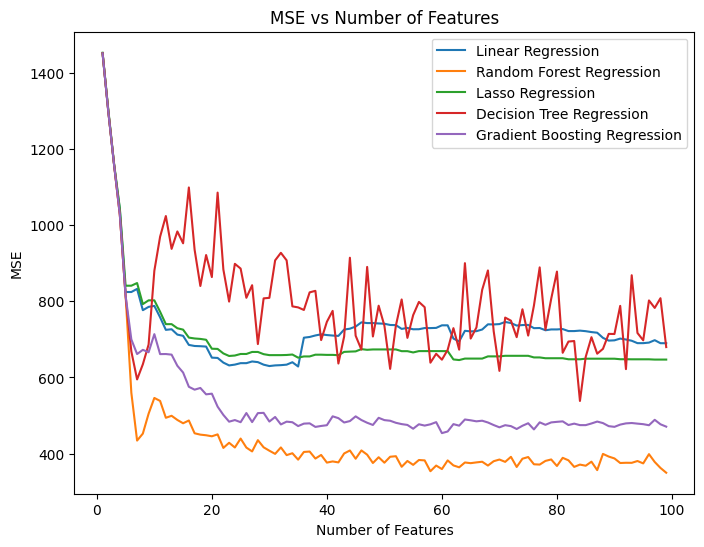

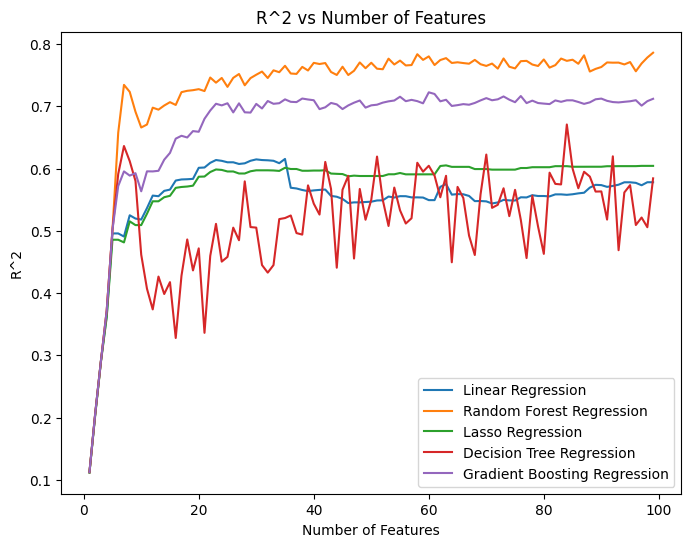

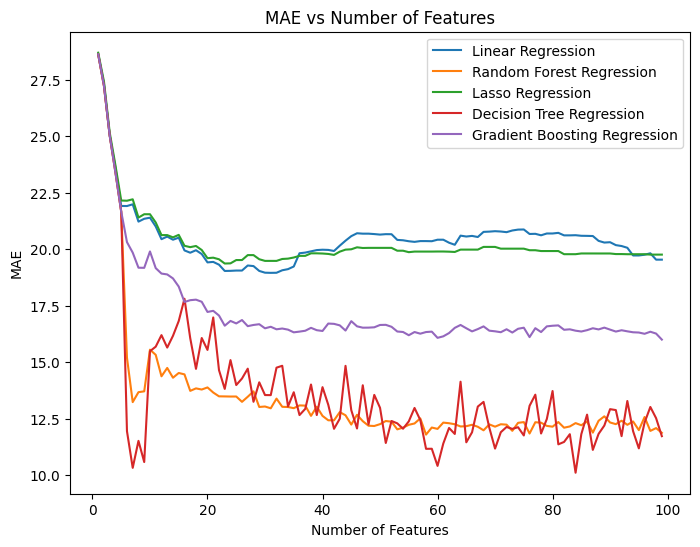

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(n_features_range, [mse[0] for mse in mse_list], label='Linear Regression')
plt.plot(n_features_range, [mse[1] for mse in mse_list], label='Random Forest Regression')
plt.plot(n_features_range, [mse[2] for mse in mse_list], label='Lasso Regression')
plt.plot(n_features_range, [mse[3] for mse in mse_list], label='Decision Tree Regression')
plt.plot(n_features_range, [mse[4] for mse in mse_list], label='Gradient Boosting Regression')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.title('MSE vs Number of Features')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(n_features_range, [r2[0] for r2 in r2_list], label='Linear Regression')
plt.plot(n_features_range, [r2[1] for r2 in r2_list], label='Random Forest Regression')
plt.plot(n_features_range, [r2[2] for r2 in r2_list], label='Lasso Regression')
plt.plot(n_features_range, [r2[3] for r2 in r2_list], label='Decision Tree Regression')
plt.plot(n_features_range, [r2[4] for r2 in r2_list], label='Gradient Boosting Regression')
plt.xlabel('Number of Features')
plt.ylabel('R^2')
plt.title('R^2 vs Number of Features')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(n_features_range, [mae[0] for mae in mae_list], label='Linear Regression')
plt.plot(n_features_range, [mae[1] for mae in mae_list], label='Random Forest Regression')
plt.plot(n_features_range, [mae[2] for mae in mae_list], label='Lasso Regression')
plt.plot(n_features_range, [mae[3] for mae in mae_list], label='Decision Tree Regression')
plt.plot(n_features_range, [mae[4] for mae in mae_list], label='Gradient Boosting Regression')
plt.xlabel('Number of Features')
plt.ylabel('MAE')
plt.title('MAE vs Number of Features')
plt.legend()
plt.show()
